# pre process dataset
the data we get is in the form of video, we need to extract the frames from the video and save them as images.

## Config
Set the input video path and output image path, as well as the output image size.

In [1]:
# Set the video directory and output directory
video_dir = './raw_data'
data_dir = './data'

#the output image size
output_size = (1024, 1024)

## peek at current raw data

In [2]:
from pathlib import Path
import cv2

video_dir = Path('./raw_data')

for video_path in video_dir.glob('*.MOV'):
    cap = cv2.VideoCapture(str(video_path))

    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    print(f'{video_path.name}: {num_frames} frames, {width}x{height} pixels')

    cap.release()


胖老虎.MOV: 1831 frames, 2160x3840 pixels
熊貓.MOV: 1789 frames, 2160x3840 pixels
銀色樹.MOV: 1576 frames, 2160x3840 pixels
兩人玩具.MOV: 1648 frames, 2160x3840 pixels
蒸汽鍋.MOV: 1647 frames, 2160x3840 pixels
岩天聰書.MOV: 2024 frames, 2160x3840 pixels
紅色捲尺.MOV: 1686 frames, 2160x3840 pixels
蘋果.MOV: 1613 frames, 2160x3840 pixels
橘子.MOV: 1659 frames, 2160x3840 pixels
瘦老虎.MOV: 2015 frames, 2160x3840 pixels
百事可樂.MOV: 1418 frames, 2160x3840 pixels
成功者方程式書.MOV: 1790 frames, 2160x3840 pixels
膠帶台.MOV: 1572 frames, 2160x3840 pixels


## extract frames from video

In [ ]:
import cv2
import os
from pathlib import Path
import imutils
from tqdm import tqdm

# Loop over each video file in the video directory
for filename in os.listdir(video_dir):
    if not filename.endswith('.MOV'):
        continue

    # Create a new directory for the output images
    class_name = Path(filename).stem
    class_dir = Path(data_dir) / class_name
    class_dir.mkdir(parents=True, exist_ok=True)

    # Open the video file using OpenCV
    video_path = Path(video_dir) / filename
    cap = cv2.VideoCapture(str(video_path))

    # Calculate the total number of frames in the video and the frame interval
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Loop over each frame in the video
    with tqdm(total=total_frames, desc=f'Processing {filename}') as pbar:
        output_num = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Resize the frame to the desired output size while preserving its aspect ratio
            frame = imutils.resize(frame, width=output_size[0], height=output_size[1])

            # Save the frame as a JPEG image
            output_path = os.path.join(class_dir, f'{output_num:06d}.jpg')
            cv2.imwrite(output_path, frame)
            output_num += 1
            pbar.update(1)

        # Release the video capture object
        cap.release()


Processing 瘦老虎.MOV:  11%|█         | 226/2015 [00:08<01:06, 26.71it/s]

## Show the output images

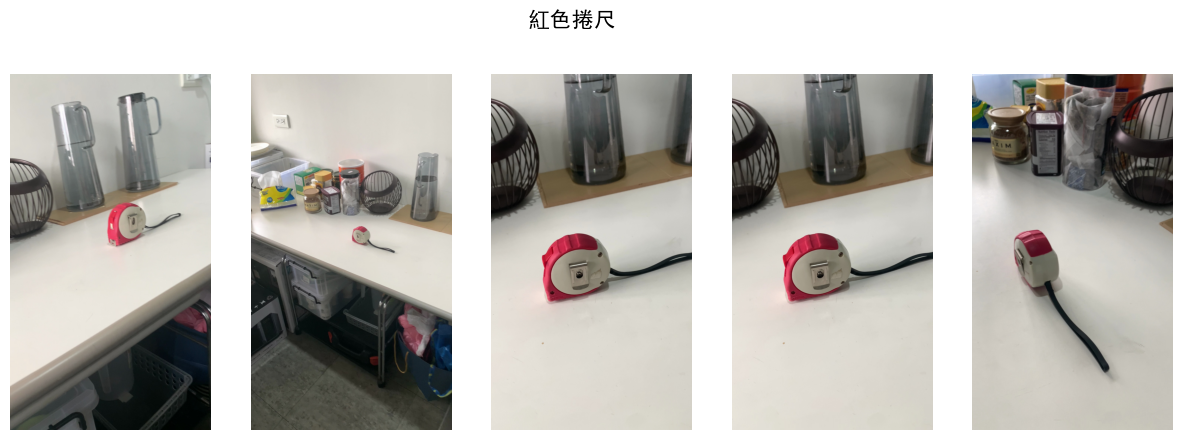

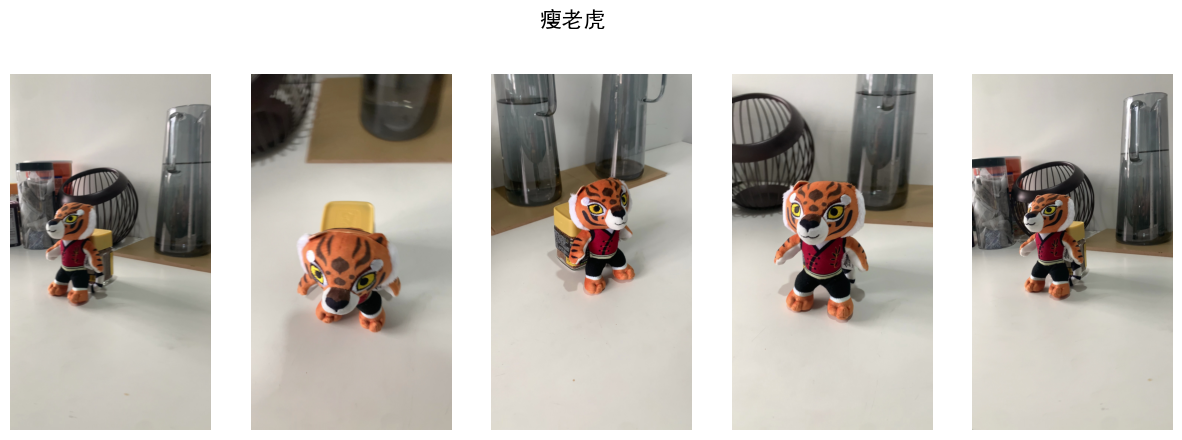

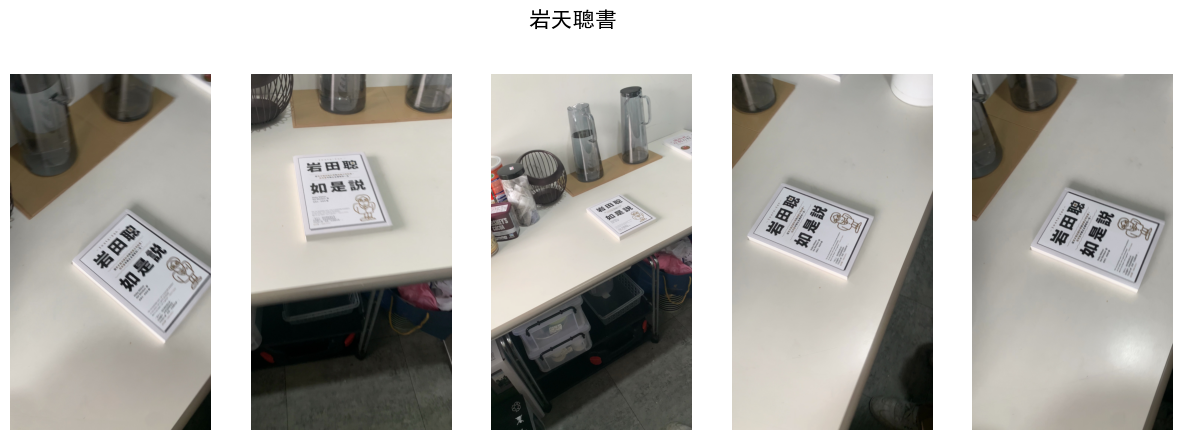

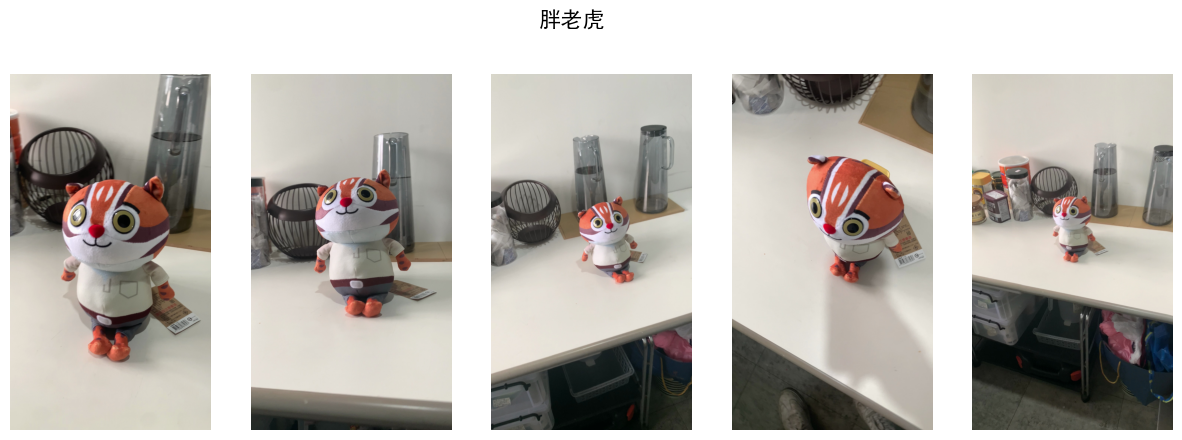

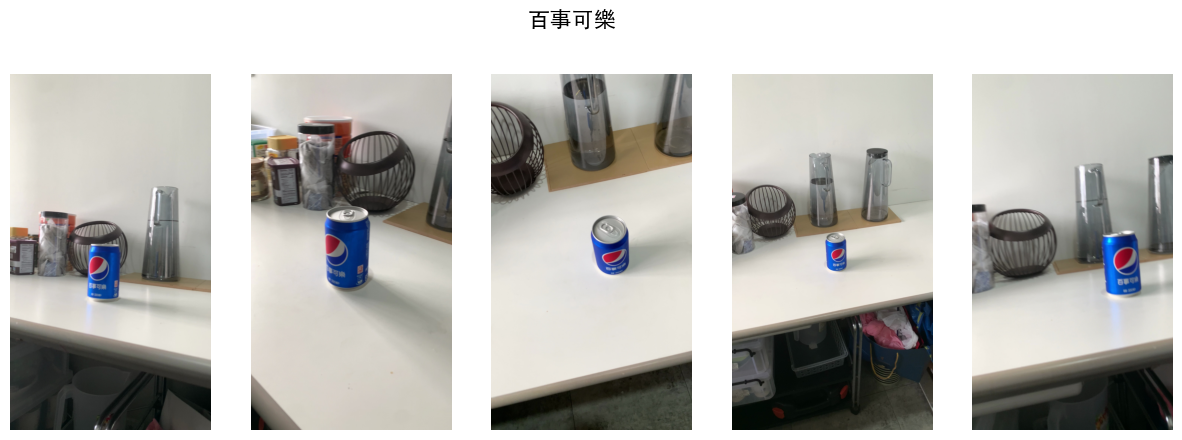

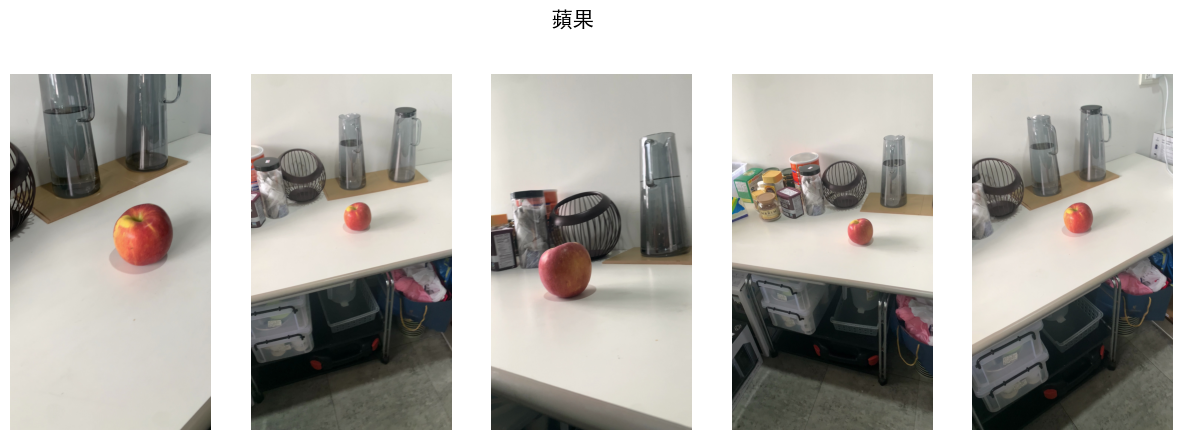

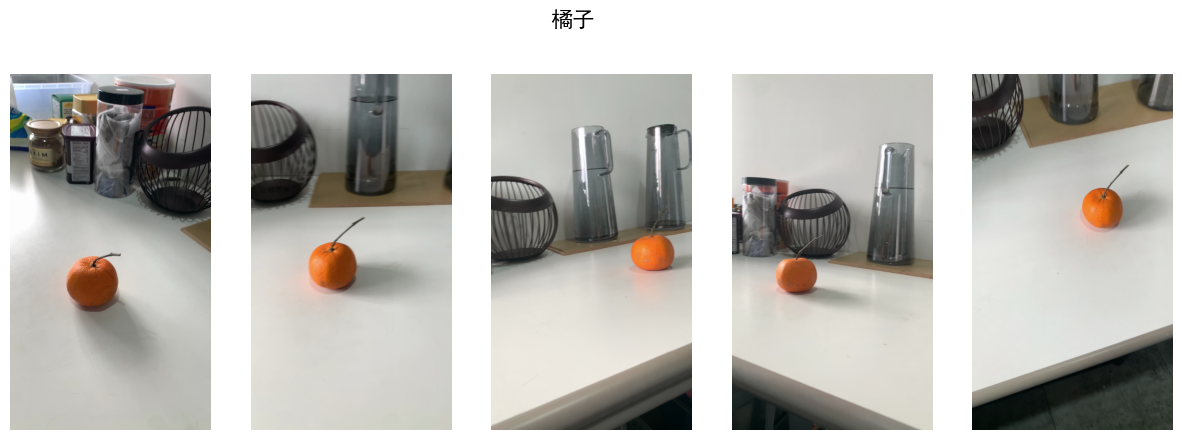

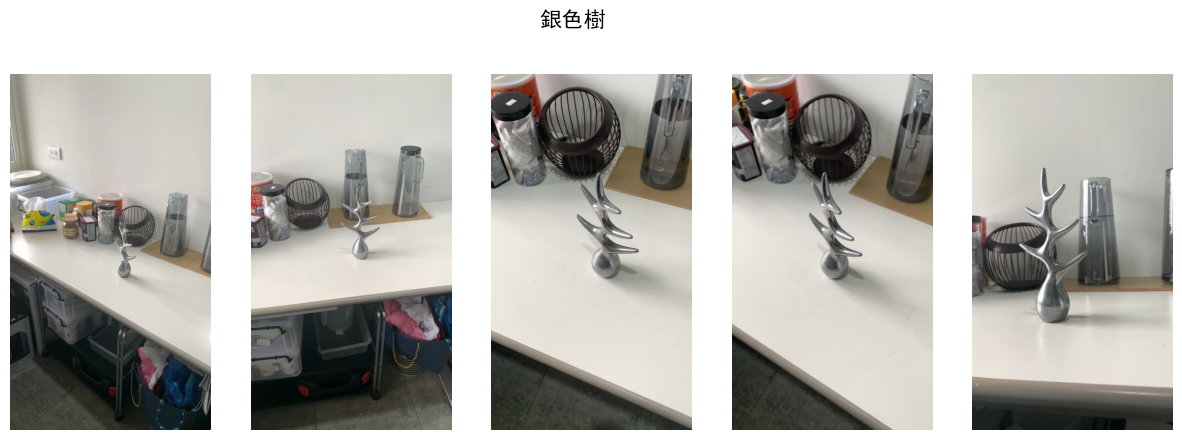

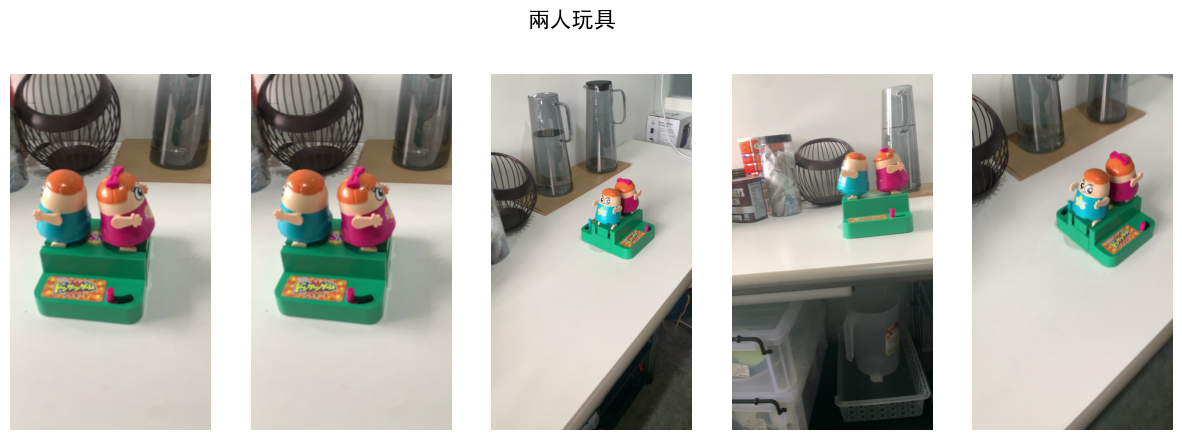

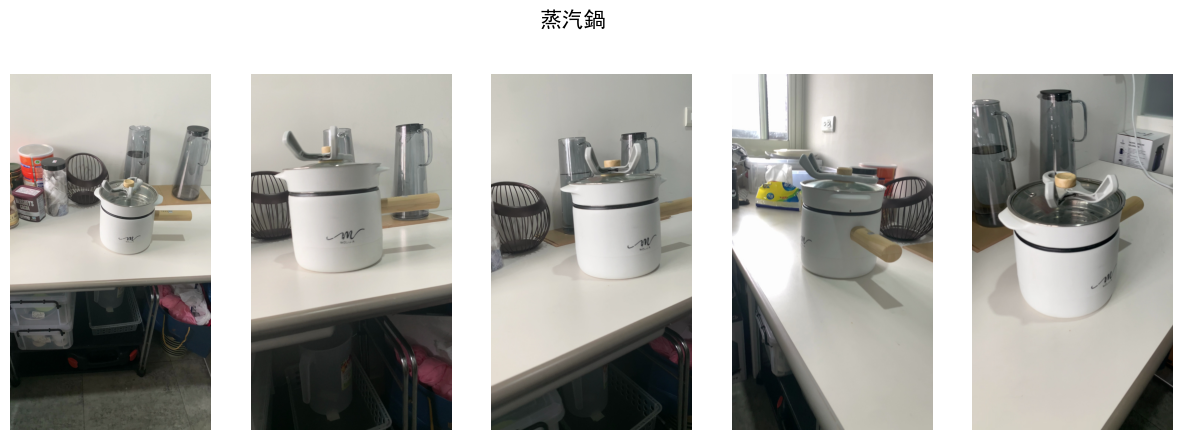

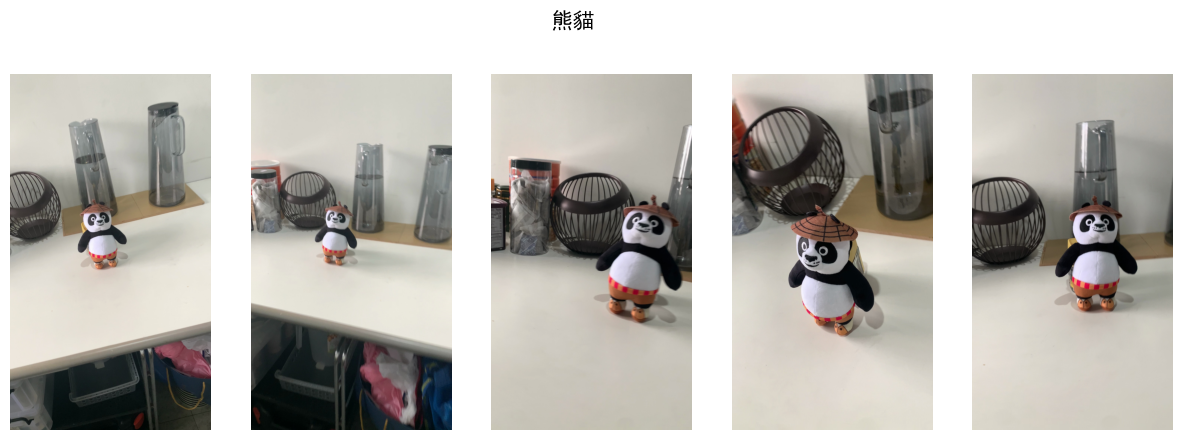

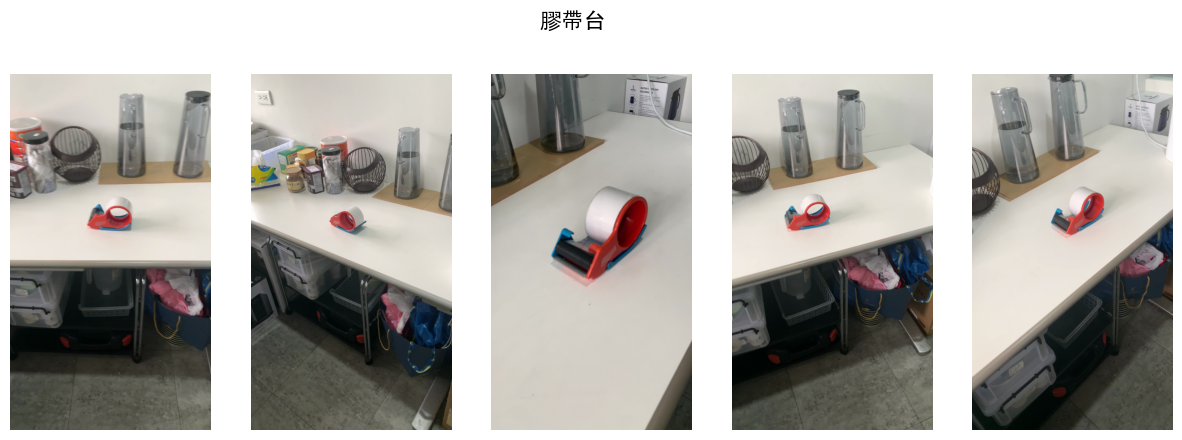

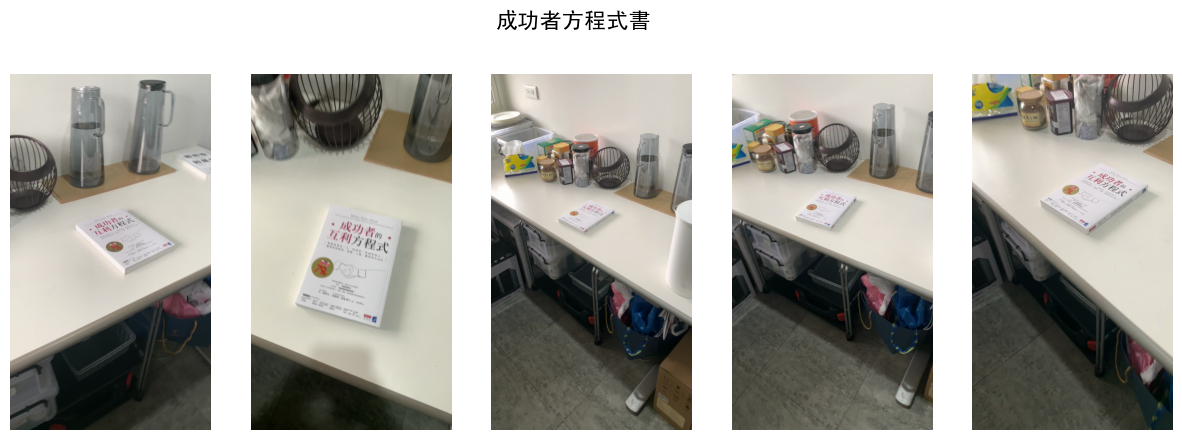

In [12]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False

# Set the directories
data_dir = './data'

# Set the number of images to sample per class
num_samples = 5

# Loop over each class directory in the data directory
for class_dirname in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_dirname)

    # Get a list of all the image files in the class directory
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]

    # Sample some images from the list
    sample_files = random.sample(image_files, num_samples)

    # Create a new figure for the class
    fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))

    # Loop over each sample file and plot it
    for i, sample_file in enumerate(sample_files):
        sample_path = os.path.join(class_dir, sample_file)

        # Load the image and resize it
        image = Image.open(sample_path)

        # Plot the image and the class name
        axs[i].imshow(image)
        axs[i].axis('off')

    # Set the title of the figure to the class name
    fig.suptitle(class_dirname, fontsize=16)

    # Display the figure
    plt.show()
